# Project: Wrangling and Analyze Data

In [7]:
import pandas as pd 
import numpy as np
import requests
import json
import re
import tweepy
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [8]:
archived_df = pd.read_csv('twitter-archive-enhanced.csv')
archived_df.T

,0,1,2,3,4,5,6,7,8,9,...,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256,891087950875897856,890971913173991426,890729181411237888,890609185150312448,890240255349198849,...,666058600524156928,666057090499244032,666055525042405380,666051853826850816,666050758794694657,666049248165822465,666044226329800704,666033412701032449,666029285002620928,666020888022790149
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,2017-08-01 16:23:56 +0000,2017-08-01 00:17:27 +0000,2017-07-31 00:18:03 +0000,2017-07-30 15:58:51 +0000,2017-07-29 16:00:24 +0000,2017-07-29 00:08:17 +0000,2017-07-28 16:27:12 +0000,2017-07-28 00:22:40 +0000,2017-07-27 16:25:51 +0000,2017-07-26 15:59:51 +0000,...,2015-11-16 01:01:59 +0000,2015-11-16 00:55:59 +0000,2015-11-16 00:49:46 +0000,2015-11-16 00:35:11 +0000,2015-11-16 00:30:50 +0000,2015-11-16 00:24:50 +0000,2015-11-16 00:04:52 +0000,2015-11-15 23:21:54 +0000,2015-11-15 23:05:30 +0000,2015-11-15 22:32:08 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...",...,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...,Here we have a majestic great white breaching ...,Meet Jax. He enjoys ice cream so much he gets ...,When you watch your owner call another dog a g...,This is Zoey. She doesn't want to be one of th...,This is Cassie. She is a college pup. Studying...,...,Here is the Rand Paul of retrievers folks! He'...,My oh my. This is a rare blond Canadian terrie...,Here is a Siberian heavily armored polar bear ...,This is an odd dog. Hard on the outside but lo...,This is a truly beautiful English Wilson Staff...,Here we have a 1949 1st generation vulpix. Enj...,This is a purebred Piers Morgan. Loves to Netf...,Here is a very happy pup. Big fan of well-main...,This is a western brown Mitsubishi terrier. Up...,Here we have a Japanese Irish Setter. Lost eye...
retweeted_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...,https://twitter.com/dog_rates/status/891815181...,https://twitter.com/dog_rates/status/891689557...,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891087950...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [9]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

with open(url.split('/')[-1], mode='wb') as f:
    f.write(r.content)
    
image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.T

,0,1,2,3,4,5,6,7,8,9,...,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074
tweet_id,666020888022790149,666029285002620928,666033412701032449,666044226329800704,666049248165822465,666050758794694657,666051853826850816,666055525042405380,666057090499244032,666058600524156928,...,890240255349198849,890609185150312448,890729181411237888,890971913173991426,891087950875897856,891327558926688256,891689557279858688,891815181378084864,892177421306343426,892420643555336193
jpg_url,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
img_num,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,1,2,1,1,1,1
p1,Welsh_springer_spaniel,redbone,German_shepherd,Rhodesian_ridgeback,miniature_pinscher,Bernese_mountain_dog,box_turtle,chow,shopping_cart,miniature_poodle,...,Pembroke,Irish_terrier,Pomeranian,Appenzeller,Chesapeake_Bay_retriever,basset,paper_towel,Chihuahua,Chihuahua,orange
p1_conf,0.465074,0.506826,0.596461,0.408143,0.560311,0.651137,0.933012,0.692517,0.962465,0.201493,...,0.511319,0.487574,0.566142,0.341703,0.425595,0.555712,0.170278,0.716012,0.323581,0.0970486
p1_dog,True,True,True,True,True,True,False,True,False,True,...,True,True,True,True,True,True,False,True,True,False
p2,collie,miniature_pinscher,malinois,redbone,Rottweiler,English_springer,mud_turtle,Tibetan_mastiff,shopping_basket,komondor,...,Cardigan,Irish_setter,Eskimo_dog,Border_collie,Irish_terrier,English_springer,Labrador_retriever,malamute,Pekinese,bagel
p2_conf,0.156665,0.0741917,0.138584,0.360687,0.243682,0.263788,0.0458854,0.0582794,0.0145938,0.192305,...,0.451038,0.193054,0.178406,0.199287,0.116317,0.22577,0.168086,0.078253,0.0906465,0.0858511
p2_dog,True,True,True,True,True,True,False,True,False,True,...,True,True,True,True,True,True,True,True,True,False
p3,Shetland_sheepdog,Rhodesian_ridgeback,bloodhound,miniature_pinscher,Doberman,Greater_Swiss_Mountain_dog,terrapin,fur_coat,golden_retriever,soft-coated_wheaten_terrier,...,Chihuahua,Chesapeake_Bay_retriever,Pembroke,ice_lolly,Indian_elephant,German_short-haired_pointer,spatula,kelpie,papillon,banana


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archived_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

KeyboardInterrupt: 

In [12]:
tweet_list = []

#read the .txt file line by line into a list of dictionaries
with open('tweet-json.txt', 'r') as jf:
    for line in jf:
            tweet_info = json.loads(line)
            tweet_list.append({
                'tweet_id' : tweet_info['id_str'],
                'retweet_count' : tweet_info['retweet_count'],
                'favorite_count' : tweet_info['favorite_count'],
                'followers_count' : tweet_info['user']['followers_count']})
                  
#tweet_list

In [13]:
#convert the list of dictionaries to a pandas DataFrame
api_df = pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count','followers_count'])
api_df

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


## Assessing Data

In [14]:
archived_df.sample(10).T

,1256,324,874,648,1,1149,944,338,2151,1758
tweet_id,710588934686908417,834086379323871233,761292947749015552,793120401413079041,892177421306343426,726828223124897792,752682090207055872,832369877331693569,669682095984410625,678755239630127104
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,2016-03-17 22:09:38 +0000,2017-02-21 17:04:24 +0000,2016-08-04 20:09:17 +0000,2016-10-31 16:00:13 +0000,2017-08-01 00:17:27 +0000,2016-05-01 17:38:46 +0000,2016-07-12 01:52:49 +0000,2017-02-16 23:23:38 +0000,2015-11-26 01:00:28 +0000,2015-12-21 01:53:54 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Beemo. He's a Chubberflop mix. 12/10 w...,This is Lipton. He's a West Romanian Snuggle P...,Meet Bonaparte. He's pupset because it's cloud...,This is Robin. She's desperately trying to do ...,This is Tilly. She's just checking pup on you....,This is Bloop. He's a Phoenician Winnebago. To...,Nothing better than a doggo and a sunset. 10/1...,This is Charlie. He fell asleep on a heating v...,Meet Louie. He just pounded that bottle of win...,This is Dash. He didn't think the water would ...
retweeted_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/710588934...,https://twitter.com/dog_rates/status/834086379...,https://twitter.com/dog_rates/status/761292947...,https://twitter.com/dog_rates/status/793120401...,https://twitter.com/dog_rates/status/892177421...,https://twitter.com/dog_rates/status/726828223...,https://twitter.com/dog_rates/status/752682090...,https://twitter.com/dog_rates/status/832369877...,https://twitter.com/dog_rates/status/669682095...,https://twitter.com/dog_rates/status/678755239...


In [15]:
archived_df.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [16]:
archived_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
archived_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
archived_df.duplicated().any()

False

In [19]:
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1094,719991154352222208,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,2,golden_retriever,0.605304,True,cocker_spaniel,0.130948,True,Labrador_retriever,0.094692,True
1584,797236660651966464,https://pbs.twimg.com/media/CxBafisWQAAtJ1X.jpg,2,collie,0.767005,True,Border_collie,0.100844,True,kelpie,0.048368,True
1114,724771698126512129,https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg,2,German_short-haired_pointer,0.835491,True,bluetick,0.058788,True,English_setter,0.037208,True
229,670403879788544000,https://pbs.twimg.com/media/CU3AxW1WoAA3_35.jpg,1,pug,0.802223,True,French_bulldog,0.172557,True,bull_mastiff,0.007163,True
465,675006312288268288,https://pbs.twimg.com/media/CV4aqCwWsAIi3OP.jpg,1,boxer,0.654697,True,space_heater,0.043389,False,beagle,0.042848,True
180,669327207240699904,https://pbs.twimg.com/media/CUntin8WIAADmLk.jpg,1,golden_retriever,0.919584,True,Labrador_retriever,0.049669,True,kuvasz,0.010216,True
1852,840632337062862849,https://pbs.twimg.com/media/C6qGphPV4AEKrdc.jpg,1,golden_retriever,0.711148,True,cocker_spaniel,0.157929,True,Labrador_retriever,0.059582,True
831,693642232151285760,https://pbs.twimg.com/media/CaBP7i9W0AAJrIs.jpg,1,Scottish_deerhound,0.111893,True,bluetick,0.074302,True,German_short-haired_pointer,0.067000,True
1666,812709060537683968,https://pbs.twimg.com/media/C0dSk98WEAALyya.jpg,1,Irish_setter,0.326873,True,golden_retriever,0.182610,True,Leonberg,0.156912,True
304,671518598289059840,https://pbs.twimg.com/media/CVG2l9jUYAAwg-w.jpg,1,Lakeland_terrier,0.428275,True,wire-haired_fox_terrier,0.111472,True,toy_poodle,0.105016,True


In [20]:
image_df.isnull().all()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [21]:
image_df.duplicated().any()

False

In [22]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
api_df.sample(10)

,tweet_id,retweet_count,favorite_count,followers_count
1070,739979191639244800,6719,21898,3200943
121,869227993411051520,4023,21112,3200891
1500,692041934689402880,1424,3724,3200950
1019,746726898085036033,2037,6648,3200943
1214,714982300363173890,1166,4094,3200947
700,786051337297522688,179,1614,3200901
411,822975315408461824,3958,19139,3200894
90,874434818259525634,15546,0,3200891
1033,744995568523612160,716,3277,3200943
251,844973813909606400,3617,16361,3200891


In [25]:
api_df.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


In [26]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [27]:
api_df.duplicated().any()

False

In [28]:
api_df.isnull().all()

tweet_id           False
retweet_count      False
favorite_count     False
followers_count    False
dtype: bool

### Quality issues
##### archived_df table
1. Contains retweets, need only original tweets with images

2. Drop irrelevant columns

3. Erroneous datatypes (tweet_id, timestamp, and source columns)

4. Short links attached to text in text column

5. Source column written in HTML format (content contained in HTML link tag) 

##### image_df table
6. Erroneous datatype (tweet_id column)

7. Missing image records (2075 instead of 2356)

##### api_df table
8. Missing records (2354 instead of 2356)

### Tidiness issues
1. doggo, floofer, pupper, and puppo columns in archived_df table should be combined into one (1) variable. 

2. image_df table and api_df table should be merged (combined) with the archived_df table.

## Cleaning Data

In [29]:
# Make copies of original pieces of data
archived_df_clean = archived_df.copy()
image_df_clean = image_df.copy()
api_df_clean = api_df.copy()

#### archived_df : Contains retweets, need only original tweets with images

##### Define: Keep only original tweets by selecting records with null retweet information (retweeted_status_id)

##### code

In [30]:
archived_df_clean = archived_df_clean[archived_df_clean['retweeted_status_id'].isnull()]

##### Test

In [31]:
archived_df_clean.retweeted_status_id.count()

0

In [32]:
archived_df_clean.shape

(2175, 17)

In [33]:
archived_df_clean.retweeted_status_id.notnull().sum()

0

#### Erroneous datatypes (tweet_id, timestamp, and source columns) in archived_df_clean table and Erroneous datatype (tweet_id column) in image_df_clean table

##### Define

convert tweet_id from integer to string datatypes. Convert timestamp to datetime data type. Convert source to categorical data type

##### Code

In [34]:
# To string
archived_df_clean.tweet_id = archived_df_clean.tweet_id.astype('str')
image_df_clean.tweet_id = image_df_clean.tweet_id.astype('str')

# To datetime
archived_df_clean.timestamp = pd.to_datetime(archived_df_clean.timestamp)

# To category
archived_df_clean.source = archived_df_clean.source.astype('category')

##### Test

In [35]:
#archived_df_clean.info()
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Doggo, floofer, pupper, and puppo columns in archived_df table should be combined into one (1) variable.

##### Define

Concatenate doggo, floofer, pupper, and puppo columns into one "dog_stage" column and clean it

##### Code

In [36]:
archived_df_clean["stage"] = archived_df_clean["doggo"] + archived_df_clean["floofer"] + archived_df_clean["pupper"] + archived_df_clean["puppo"]

In [37]:
#check to see the concatenated values
archived_df_clean["stage"].unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [38]:
#a function to properly fill the dog_stages
stg = archived_df_clean["stage"].unique()
def get_stages(archived_df_clean):
    for i in pd.Series(archived_df_clean["stage"]):
        if i == stg[0]: 
            return 'None'
        elif i == stg[1]:
            return 'Doggo'
        elif i == stg[2]:
            return 'Puppo'
        elif i == stg[3]:
            return 'Pupper'
        elif i == stg[4]:
            return 'Floofer'
        elif i == stg[5]:
            return 'Doggo-Puppo'
        elif i == stg[6]:
            return 'Doggo_Floofer'
        else:
            return 'Doggo-Pupper'
    
        
archived_df_clean['dog_stage'] = archived_df_clean.apply(get_stages, axis = 1)

In [39]:
#drop old dog_stage columns(doggo, floofer, pupper, puppo)
archived_df_clean.drop(['doggo','floofer','pupper','puppo','stage'], axis=1, inplace = True)

##### Test

In [40]:
archived_df_clean.dog_stage.value_counts()

None             1831
Pupper            224
Doggo              75
Puppo              24
Doggo-Pupper       10
Floofer             9
Doggo-Puppo         1
Doggo_Floofer       1
Name: dog_stage, dtype: int64

In [41]:
archived_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### Retweet_count, favorite_count, followers_count should be part of archived_df table

##### Define

 Merge the retweet_count, favorite_count and followers_count column to the archived_df table, joining on tweet_id

##### Code

In [42]:
archived_df_clean = pd.merge(archived_df_clean, api_df_clean, on='tweet_id', how = 'left')

##### Test

In [43]:
archived_df_clean.shape

(2175, 17)

In [44]:
archived_df_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,followers_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467,3200889
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819,3200889
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,25461,3200889
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,42908,3200889
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,41048,3200889


#### Image prediction data should be part of archived_df table

##### Define

Merge the image_df table to the archived_df table, joining on tweet_id.

##### Code

In [45]:
archived_df_clean = pd.merge(archived_df_clean, image_df_clean, on = 'tweet_id', how = 'left')

##### Test

In [46]:
archived_df_clean.shape

(2175, 28)

In [47]:
archived_df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


#### Drop irrelevant columns

##### Define

Drop all columns not needed for our analysis

##### Code

In [48]:
archived_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis = 1, inplace = True)

##### Test

In [49]:
archived_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'followers_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

#### Missing Data: missing records in both image_df and api_df tables already merged into archived_df table

##### Define

Don't have the missing data: 'Drop' all Nan records in archive_df

##### Code

In [50]:
archived_df_clean.dropna(axis=0, inplace = True)

##### Test

In [51]:
archived_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null category
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
followers_count       1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               199

In [52]:
archived_df_clean.shape

(1994, 22)

#### Short links attached to text in text column

##### Define

Use regex to split the text column and return content without the links.

##### Code|

In [53]:
archived_df_clean['text'] = archived_df_clean.text.apply(lambda x: re.split('https:\/\/.*', str(x))[0])

##### Test

In [54]:
with pd.option_context('max_colwidth', 200):
    display(archived_df_clean.head(5))

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,None,8853,39467,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,None,6514,33819,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,None,4328,25461,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,None,8964,42908,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,None,9774,41048,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Source column written in HTML format (content contained in HTML link tag)

##### Define


Use regex pattern matching to extract the text in the HTML tags 

##### Code

In [55]:
with pd.option_context('max_colwidth', 200):
    display(archived_df_clean.head(2))

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,None,8853,39467,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,None,6514,33819,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [56]:
archived_df_clean['source'] = archived_df_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

##### Test

In [57]:
with pd.option_context('max_colwidth', 200):
    display(archived_df_clean.head(5))

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,None,8853,39467,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,None,6514,33819,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,None,4328,25461,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,None,8964,42908,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,None,9774,41048,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
archived_df_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data

In [59]:
#load the saved csv file again into a dataframe
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")

In [60]:
#crosscheck the datatypes again
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
followers_count       1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null floa

In [61]:
#correct the erroneous datatypes
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)
twitter_archive_master.source = twitter_archive_master.source.astype("category")
twitter_archive_master.dog_stage = twitter_archive_master.dog_stage.astype("category")
twitter_archive_master.img_num = twitter_archive_master.img_num.astype(int)

In [62]:
#TEST
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null category
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             1994 non-null category
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
followers_count       1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 no

In [63]:
twitter_archive_master.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### Insights:
1. What source generated the most tweets?

2. What dog stage was the most represented?

3. What percentage/number of the first image prediction were identified dogs(p1_dog)?

#### Q1 What source generated the most tweets?

In [64]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

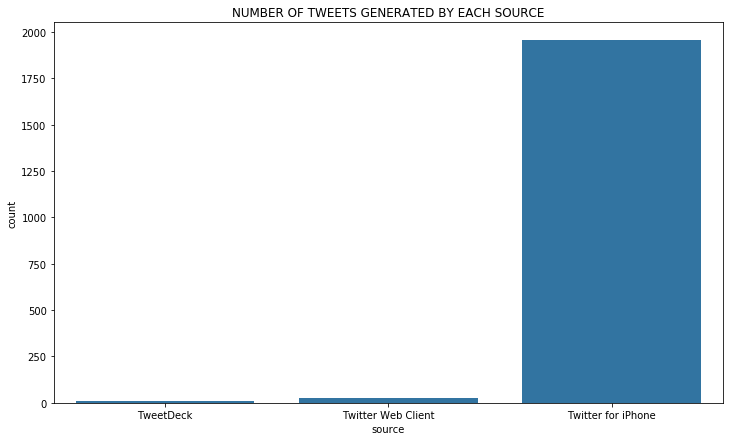

In [65]:
plt.figure(figsize=(12,7))
base_color = sns.color_palette()[0]
sns.countplot(x=twitter_archive_master.source, color = base_color)
plt.title("NUMBER OF TWEETS GENERATED BY EACH SOURCE");

The above chart shows that most of the tweets contained in the dataset came from "Twitter for iPhone".

#### Q2 What dog stage was the most represented?

In [66]:
twitter_archive_master.dog_stage.value_counts()

None             1688
Pupper            203
Doggo              63
Puppo              22
Doggo-Pupper        9
Floofer             7
Doggo_Floofer       1
Doggo-Puppo         1
Name: dog_stage, dtype: int64

In [ ]:
x = twitter_archive_master.dog_stage.value_counts()
x
plt.figure(figsize=(12,7))
x.plot.bar(color = 'blue', width = 0.5)
plt.xlabel("DOG STAGES")
plt.ylabel("NUMBER OF DOGS")
plt.title("NUMBER OF DOGS PER DOG STAGES REPRESENTED");

From the dataset it is seen that the dog stages of a lot of tweets were not given. The most represented however from the chart is the "Pupper" dog stage.

#### Q3 What percentage/number of the first image prediction were identified dogs (p1_dog)?

In [ ]:
prob = twitter_archive_master.p1_dog.value_counts()
prob

In [ ]:
pb = twitter_archive_master.p1_dog.mean()*100 
print(pb)
pbn = 100 - pb
print(pbn)

In [ ]:
plt.figure(figsize=(12,8))
prob.plot.bar(color = 'blue', width = 0.5);
plt.title("NUMBER OF ACCURATE FIRST IMAGE PREDICTIONS (P1)")
plt.xlabel("Result of prediction")
plt.ylabel("Number of respective predicted result");

The above chart shows that 74.07% of the first image predictions were dogs and about  25.93% were not identified as dogs.

### Visualization
#### 1. Is there a correlation between the number of favorites (likes on the post) and the retweets generated? How are they related?

In [ ]:
#check and compare correlation values between retweet_count, favorite_count and followers_count.
c1 = twitter_archive_master.favorite_count.corr(twitter_archive_master.retweet_count)
c2 = twitter_archive_master.followers_count.corr(twitter_archive_master.retweet_count)
c3 = twitter_archive_master.followers_count.corr(twitter_archive_master.favorite_count)

print("correlation:\n Favorite_count vs Retweet_count:{}\n Followers_count vs Retweet_count:{}\n Favorite_count vs Followers_count:{}".format(c1,c2,c3))

In [ ]:
#plot to visualize the correlation between Favorite_count and Retweet_count
plt.figure(figsize = (12, 8))
plt.scatter(x = twitter_archive_master.favorite_count, y = twitter_archive_master.retweet_count)
plt.xlabel("FAVORITE_COUNT")
plt.ylabel("RETWEET_COUNT")
plt.title("RELATIONSHIP BETWEEN THE RETWEET_COUNT AND FAVORITE_COUNT")
plt.show()

The above scatter plot shows the relationship between the Favorite count and the Retweet count. From the chart it can  be seen that there is a positive correlation which means that with an increase in the number of favorites, there is an increase in the number of retweets.